In [10]:
import pickle
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from collections import defaultdict
with open('embed_img.pkl', 'rb') as f:
    img = pickle.load(f)
with open('embed_text.pkl', 'rb') as f:
    text = pickle.load(f)


In [28]:
class_10 = list(set(text))

food_dict = defaultdict(int)

text_idx_list = []

for idx in range(len(text)):
    label = text[idx]
    if food_dict[label] < 100:
        food_dict[label] += 1
        text_idx_list.append(idx)

386


38341

In [29]:
img_class_10 = []
text_class_10 = []

img = np.array(img)
text = np.array(text)

img_sample = img[text_idx_list]
text_sample = text[text_idx_list]

In [41]:
import json
from collections import defaultdict

with open("../data/labels.json") as f:
    labels = json.load(f)
food_to_id = {label["label"]: label["id"] for label in labels["categories"]}

with open("../data/category_dict.json", encoding='euc-kr') as f:
    category_to_food = json.load(f)

food_to_category = defaultdict(int)

for category in category_to_food:
    food_list = category_to_food[category]
    for food in food_list:
        food_to_category[food_to_id[food]] = int(category)

category_to_idxList = defaultdict(list)

for idx, total_idx in enumerate(text_idx_list):
    food = text_sample[idx]
    category = food_to_category[food]
    category_to_idxList[category].append(total_idx)


In [16]:
with open("../data/labels.json") as f:
    labels = json.load(f)
id_to_food = {label["id"]: label["label"] for label in labels["categories"]}


In [ ]:
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(img)
embedding.shape

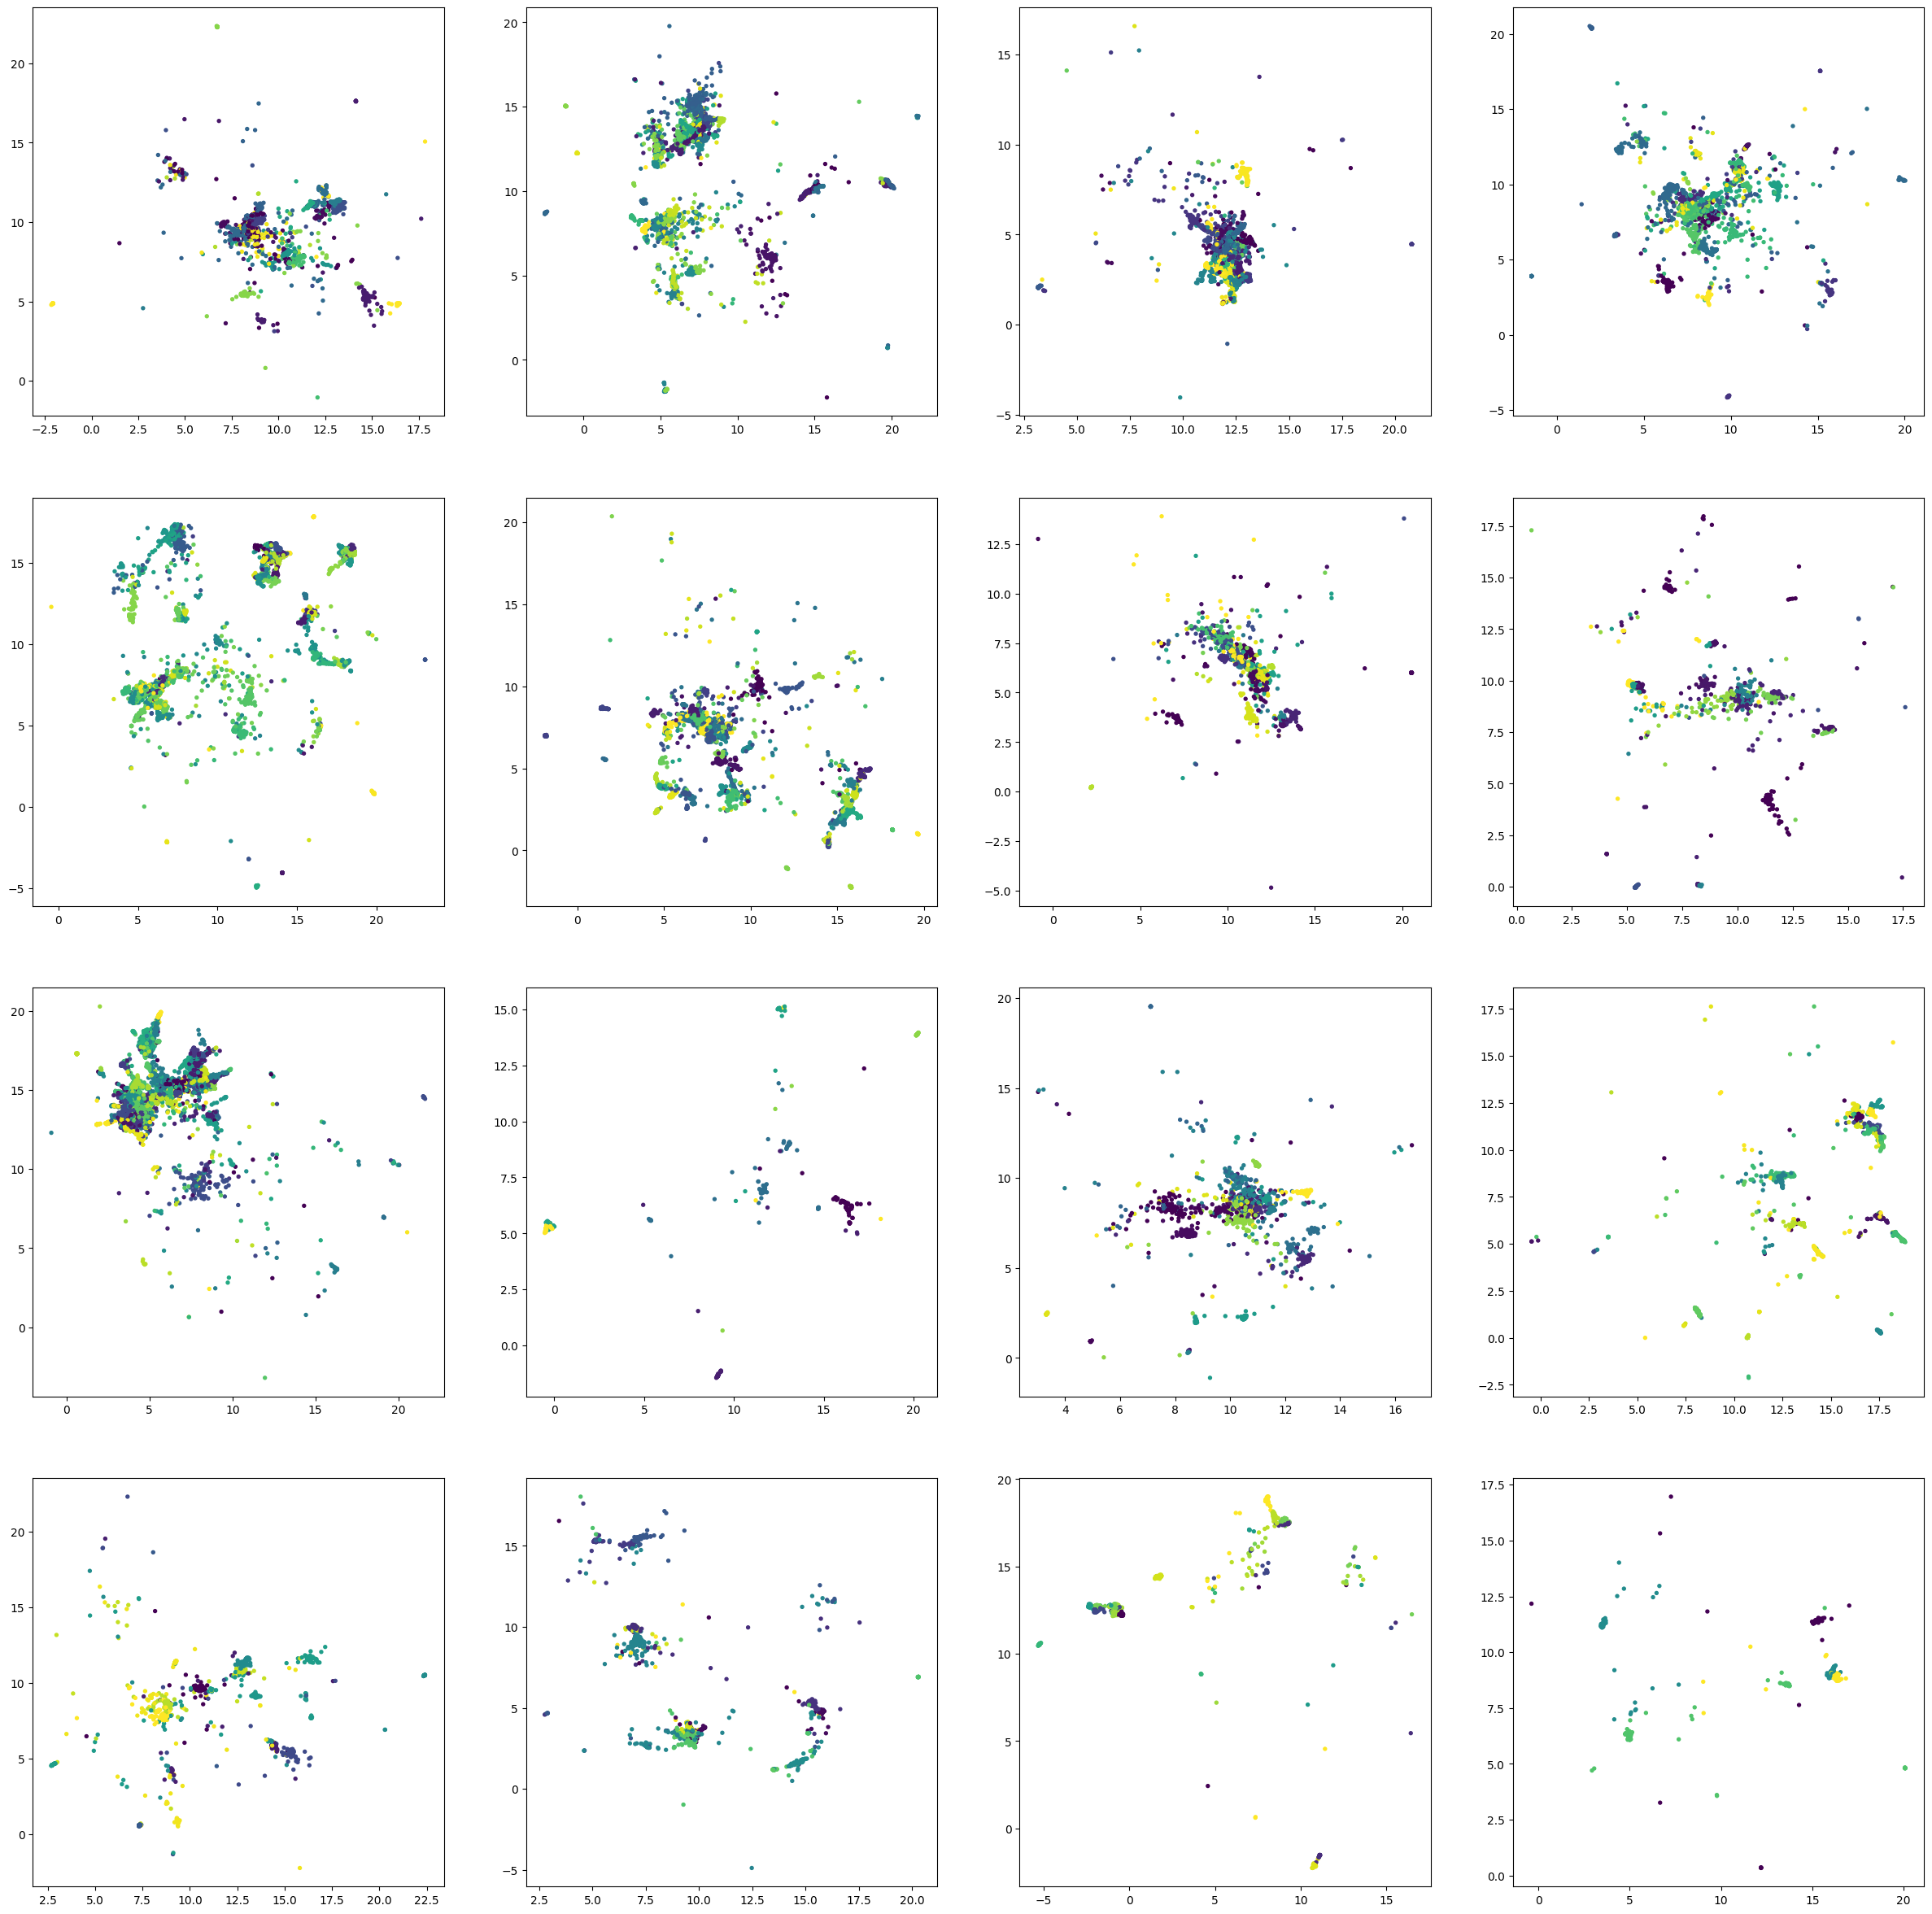

In [57]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 4, figsize=(30, 30))

for idx, category in enumerate(category_to_idxList):
    print()
    food_list = category_to_idxList[category]
    
    img_list = embedding[food_list]
    text_list = text[food_list]

    x = img_list[:,0]
    y = img_list[:,1]

    ax[idx // 4][idx % 4].scatter(x, y, s=8,c=text_list, label=text_list)
    # for i, food in enumerate(list(text_list)):
    #     # TODO 한글 인코딩
    #     ax[idx // 4][idx % 4].annotate(food, (x[i], y[i]))
    

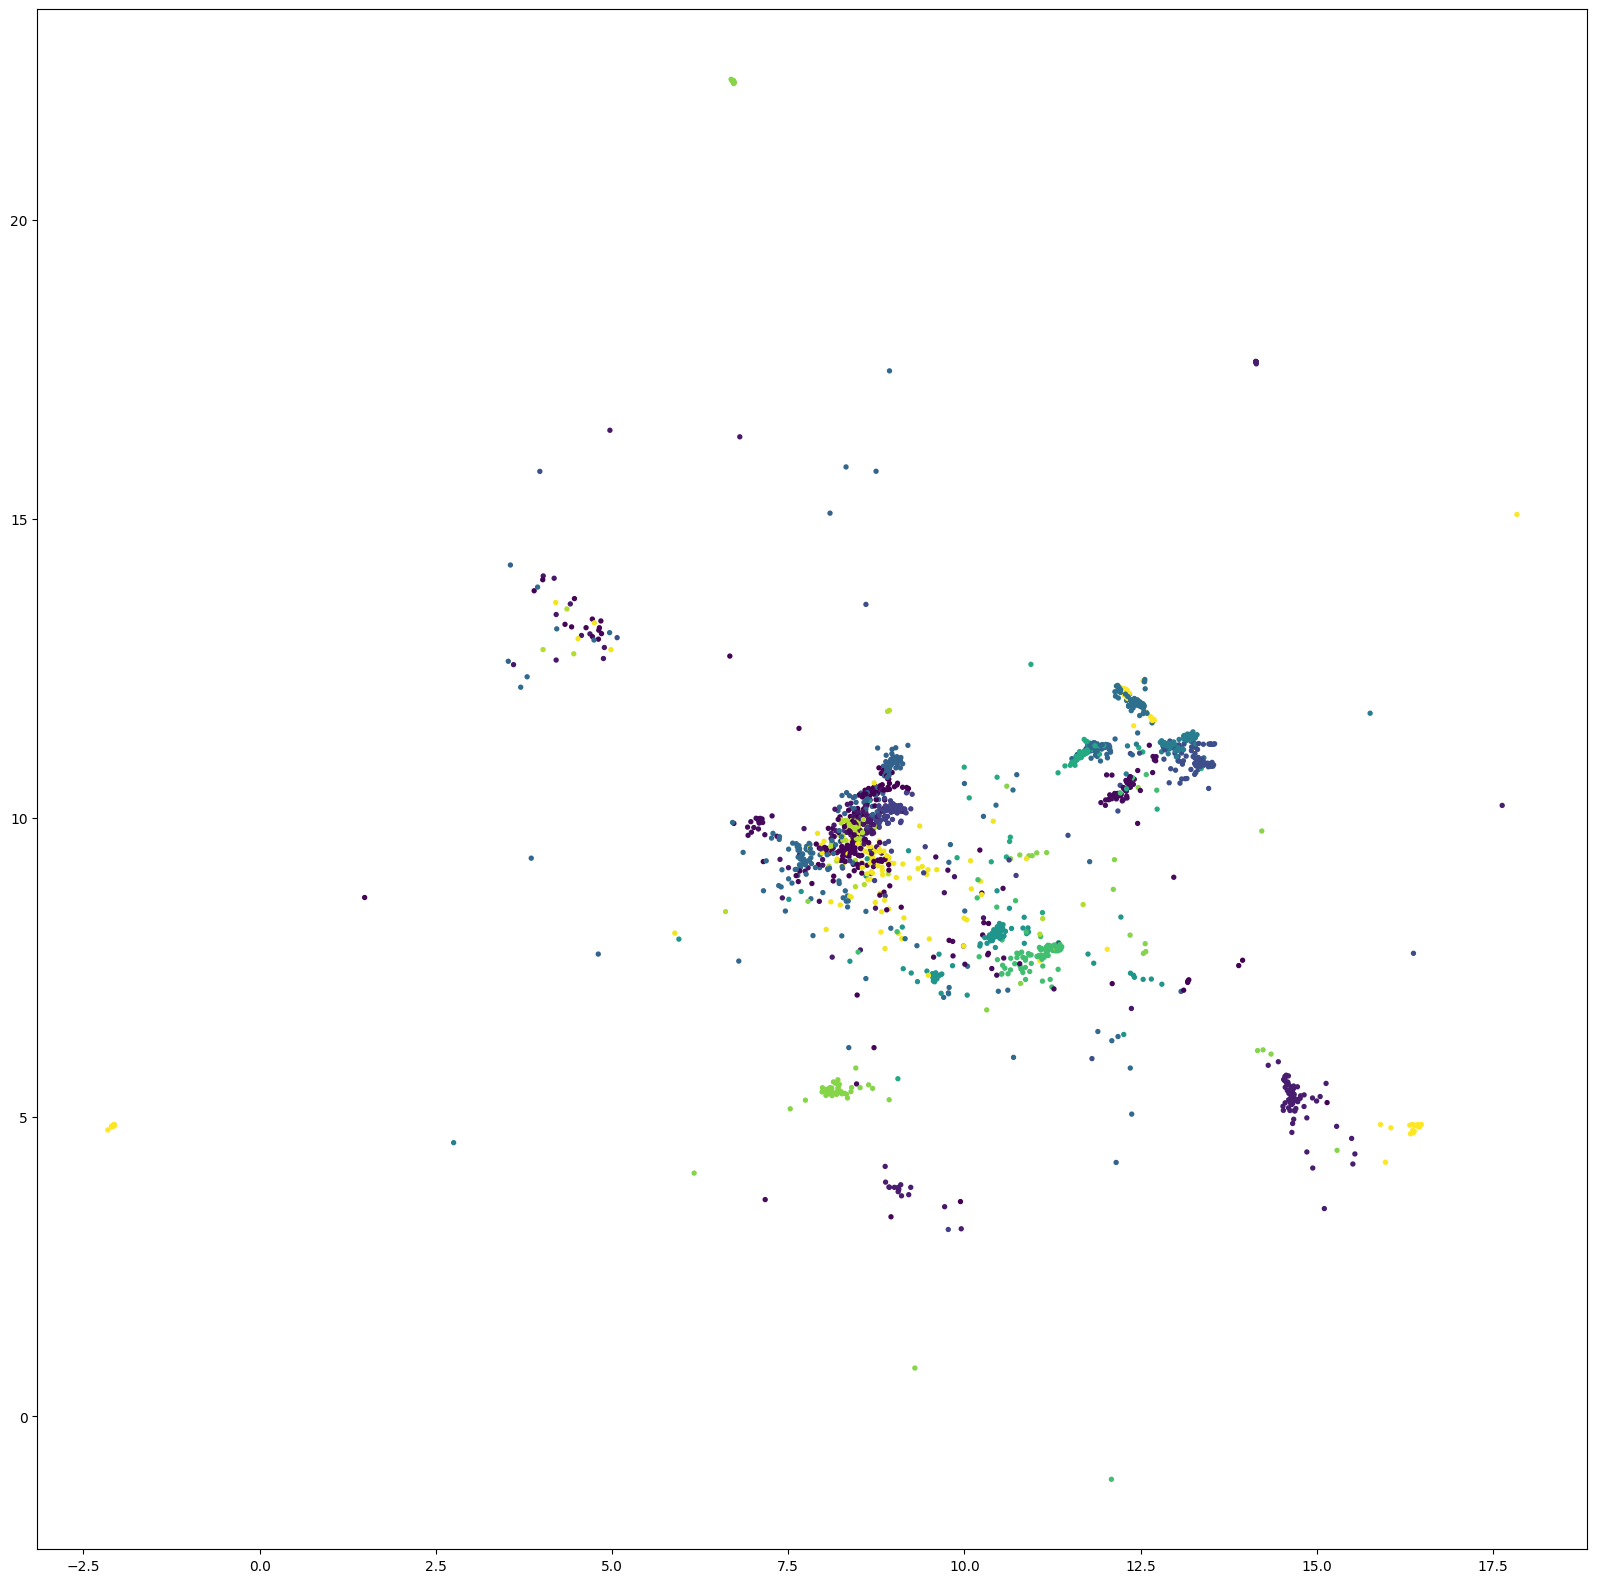

In [56]:
# food_list = category_to_idxList[category]
    
# img_list = embedding[food_list]
# text_list = text[food_list]

# x = img_list[:,0]
# y = img_list[:,1]

# plt.figure(figsize=(20,20))
# plt.scatter(x, y, s=8,c=text_list, label=text_list)
# for i, food in enumerate(list(text_list)):
#     # TODO 한글 인코딩
#     plt.annotate(food, (x[i], y[i]))

In [24]:
# predict = clf.predict(x_test)

In [25]:
# predict

In [26]:
# predict_proba = clf.predict_proba(x_test)

In [27]:
# predict_proba

In [28]:
# score = clf.score(x_test, y_test)

In [29]:
# score

In [30]:
import numpy

small_img_arr = numpy.array(small_img)
small_img_arr.shape

(1000, 512)

In [31]:
import pandas as pd

df = pd.DataFrame(columns={"text": small_text})

In [32]:
import random
from collections import defaultdict

class_10 = list(set(text))

food_dict = defaultdict(int)

text_idx_list = []

for idx in range(len(text)):
    label = text[idx]
    if food_dict[label] <= 100:
        food_dict[label] += 1
        text_idx_list.append(idx)

img_class_10 = []
text_class_10 = []

for idx in text_idx_list:
    img_class_10.append(img[idx])
    text_class_10.append(text[idx])

In [ ]:
import numpy as np

print(np.array(img_class_10).shape)
print(np.array(text_class_10).shape)

In [ ]:
set(text_class_10)

In [35]:

img_class_10 = np.array(img_class_10)
text_class_10 = np.array(text_class_10)


In [36]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(img_class_10)
X_embedded.shape

(38719, 2)

<AxesSubplot:>

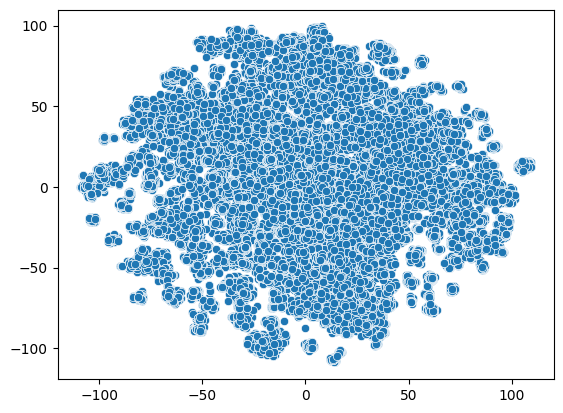

In [37]:
import seaborn as sns

sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1])

386


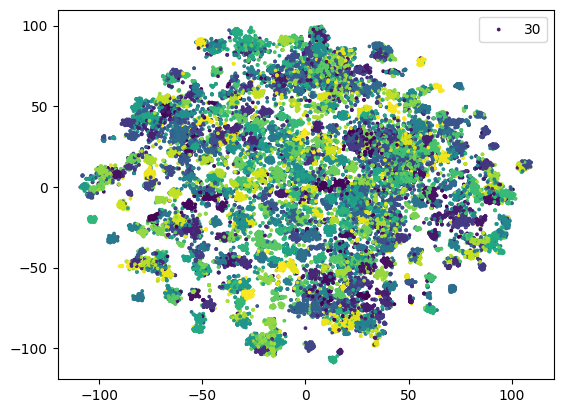

In [38]:
import matplotlib.pyplot as plt

x = X_embedded[:,0]
y = X_embedded[:,1]

# colors = np.random.rand(n)
plt.scatter(x, y, s=3,c=text_class_10, label=text_class_10)
plt.legend(text_class_10)
print(len(set(text_class_10)))
plt.show()


In [39]:
text_class_10

array([ 30, 138, 173, ...,  68, 188,  89])